In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
import seaborn as sns
import warnings

In [57]:
# 데이터 불러오기
import pandas as pd
df = pd.read_csv("C:/Users/82108/OneDrive/문서/카카오톡 받은 파일/chatgpt_sentiment_demoji.csv")

In [58]:
df

,Text,emoji,negative,neutral,positive,predicted_label,date,likes,location,followers,following,retweets,replies
0,If I were a journalist or reporter writing cli...,NaN,0.952584,0.037600,0.009816,negative,2023-02-10 23:59:49+00:00,1,Fukuoka 福岡 | Japan 日本,2012,388,0,0
1,Imagine if the mid season twist was that theyr...,NaN,0.031874,0.156266,0.811859,positive,2023-02-10 23:59:35+00:00,8,"Manhattan, NY",19855,5722,1,2
2,I see the difference between leader and employ...,NaN,0.158342,0.312784,0.528873,positive,2023-02-10 23:59:18+00:00,4,NaN,23,577,0,1
3,Which means your job is at risk man facepalmin...,['🤦\u200d♂️'],0.161833,0.805698,0.032469,neutral,2023-02-10 23:59:16+00:00,0,NaN,108,224,0,0
4,What have you been using Chatgpt for?,NaN,0.005627,0.968457,0.025916,neutral,2023-02-10 23:59:16+00:00,1,"Chicago, IL",11155,478,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
975445,"Just launched ChatGPT, our new AI system which...",NaN,0.004002,0.014325,0.981673,positive,2022-11-30 18:06:29+00:00,2370,NaN,203790,66,371,84
975446,"THRILLED to share that ChatGPT, our new model ...",NaN,0.005804,0.015195,0.979001,positive,2022-11-30 18:05:58+00:00,559,neighborhoodsf.com (sf),1572,604,67,26
975447,ChatGPT: Optimizing Language Models for Dialog...,NaN,0.003987,0.884664,0.111349,neutral,2022-11-30 18:02:58+00:00,2,The Internet,475,13,1,0
975448,"Try talking with ChatGPT, our new AI system wh...",NaN,0.003811,0.017800,0.978389,positive,2022-11-30 18:02:06+00:00,13597,NaN,1492374,0,3504,1313


In [59]:
df.describe()

,negative,neutral,positive,likes,followers,following,retweets,replies
count,975450.000000,975450.000000,975450.000000,975450.000000,9.754500e+05,9.754500e+05,975450.000000,975450.000000
mean,0.230154,0.429948,0.339897,11.961189,3.231735e+04,1.573738e+03,1.765541,1.114315
std,0.351496,0.372162,0.376154,355.771275,7.281230e+05,9.618419e+03,57.776420,36.731214
min,0.001543,0.005018,0.003674,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.007246,0.051826,0.019041,0.000000,8.600000e+01,1.480000e+02,0.000000,0.000000
50%,0.027923,0.339673,0.118635,1.000000,4.390000e+02,4.600000e+02,0.000000,0.000000
75%,0.279596,0.843093,0.744464,2.000000,2.041000e+03,1.214000e+03,0.000000,1.000000
max,0.986359,0.993227,0.990427,111653.000000,1.287402e+08,1.526451e+06,13072.000000,19942.000000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975450 entries, 0 to 975449
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Text             975053 non-null  object 
 1   emoji            125629 non-null  object 
 2   negative         975450 non-null  float64
 3   neutral          975450 non-null  float64
 4   positive         975450 non-null  float64
 5   predicted_label  975450 non-null  object 
 6   date             975450 non-null  object 
 7   likes            975450 non-null  int64  
 8   location         705265 non-null  object 
 9   followers        975450 non-null  int64  
 10  following        975450 non-null  int64  
 11  retweets         975450 non-null  int64  
 12  replies          975450 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 96.7+ MB


In [61]:
df.isnull().sum()

Text                  397
emoji              849821
negative                0
neutral                 0
positive                0
predicted_label         0
date                    0
likes                   0
location           270185
followers               0
following               0
retweets                0
replies                 0
dtype: int64

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
C:\Users\82108\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82108\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82108\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82108\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49437 (\N{HANGUL SYLLABLE SEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82108\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44208 (\N{HANGUL SY

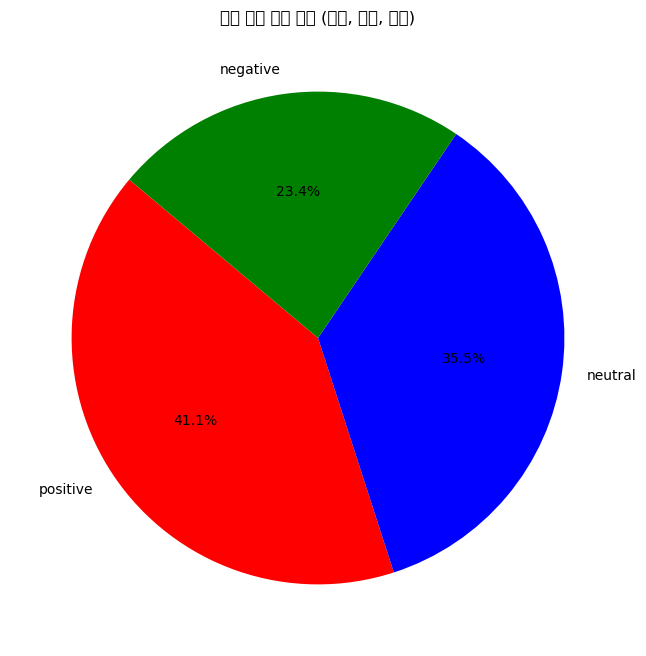

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
C:\Users\82108\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\82108\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'NanumBarunGothic

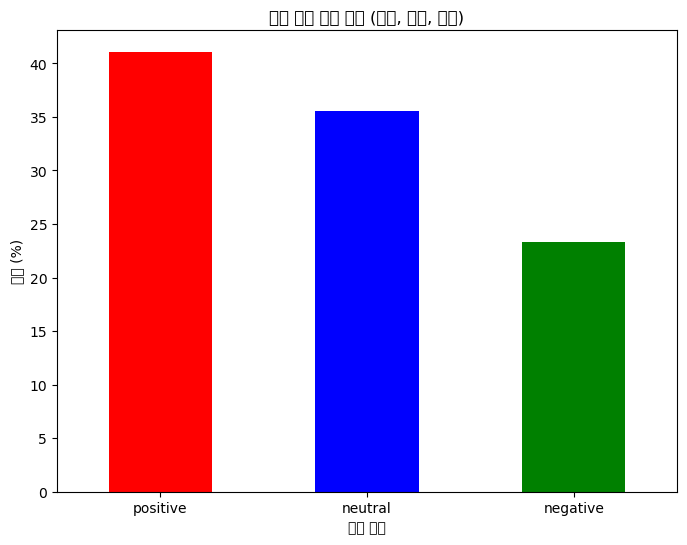

In [56]:
 # 감성 분석 결과(긍정, 중립, 부정)의 비율을 계산
sentiment_counts = df_cleaned['predicted_label'].value_counts(normalize=True) * 100

# 감성 분석 결과를 시각화 (파이 차트)
plt.figure(figsize=(8, 8))
plt.pie(
    sentiment_counts, 
    labels=sentiment_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=['red', 'blue', 'green']
)
plt.title("감성 분석 결과 비율 (긍정, 중립, 부정)")
plt.show()

# 감성 분석 결과를 시각화 (막대 그래프)
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['red', 'blue', 'green'])
plt.xlabel("감성 유형")
plt.ylabel("비율 (%)")
plt.title("감성 분석 결과 비율 (긍정, 중립, 부정)")
plt.xticks(rotation=0)
plt.show()

In [82]:
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [83]:
df = pd.read_csv("C:/Users/82108/OneDrive/문서/카카오톡 받은 파일/chatgpt_sentiment_demoji.csv")

In [87]:
df["count"] = df.groupby("Text")["Text"].transform("count")
wc = df.set_index("Text").to_dict()["count"]

In [88]:
wordCloud = WordCloud(
    font_path = "malgun",
    width = 400,
    height = 400,
    max_font_size = 100,
    background_color = 'white'
).generate_from_frequencies(wc)


(-0.5, 399.5, 399.5, -0.5)

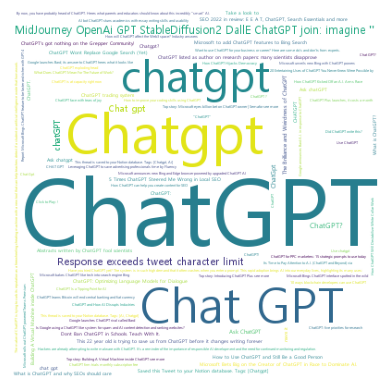

In [89]:
plt.figure()
plt.imshow(wordCloud)
plt.axis('off')

In [90]:
# 결측치 처리
df_cleaned = df.copy()
df_cleaned['Text'].fillna('',inplace=True) # 텍스트 결측치는 빈 문자열로 대체
df_cleaned['emoji'].fillna('[]', inplace=True)  # 이모지는 빈 리스트 문자열로 대체
df_cleaned['location'].fillna('Unknown', inplace=True)  # 위치 정보 결측치는 'Unknown'으로 대체

In [91]:
# 날짜 데이터 타입 변환 
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'], errors='coerce')

In [92]:
# 중복 데이터 제거
df_cleaned.drop_duplicates(subset=['Text', 'date'], keep='first', inplace=True)

In [93]:
# 필요 없는 공백 제거 
df_cleaned['Text'] = df_cleaned['Text'].str.strip()

In [94]:
# 감성 점수 정규화
df_cleaned['sentiment_score'] = df_cleaned['positive'] - df_cleaned['negative']